0
0
1
2
3
4
5
6
7
8
9
10
11
12
Acorn worm
o
(0.7450980392156863, 0.7294117647058823, 0.8549019607843137, 1.0)
Akashiwo
h
(0.8, 0.9215686274509803, 0.7725490196078432, 1.0)
Brittlestar
1
(1.0, 1.0, 0.7019607843137254, 1.0)
Ceratium_sp_Fork
2
(1.0, 0.9294117647058824, 0.43529411764705883, 1.0)
Ceratium_sp_noFork
4
(1.0, 0.9294117647058824, 0.43529411764705883, 1.0)
Dendraster
d
(0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0)
Polychaete
P
(0.7019607843137254, 0.8705882352941177, 0.4117647058823529, 1.0)
Polychaete
P
(0.7019607843137254, 0.8705882352941177, 0.4117647058823529, 1.0)
Sea cucumber
p
(0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0)
Sea urchin
s
(0.984313725490196, 0.5019607843137255, 0.4470588235294118, 1.0)
Snail
8
(0.9921568627450981, 0.7058823529411765, 0.3843137254901961, 1.0)
Starfish
*
(0.5019607843137255, 0.6941176470588235, 0.8274509803921568, 1.0)
Volvox
v
(0.9882352941176471, 0.803921568627451, 0.8980392156862745, 1.0)


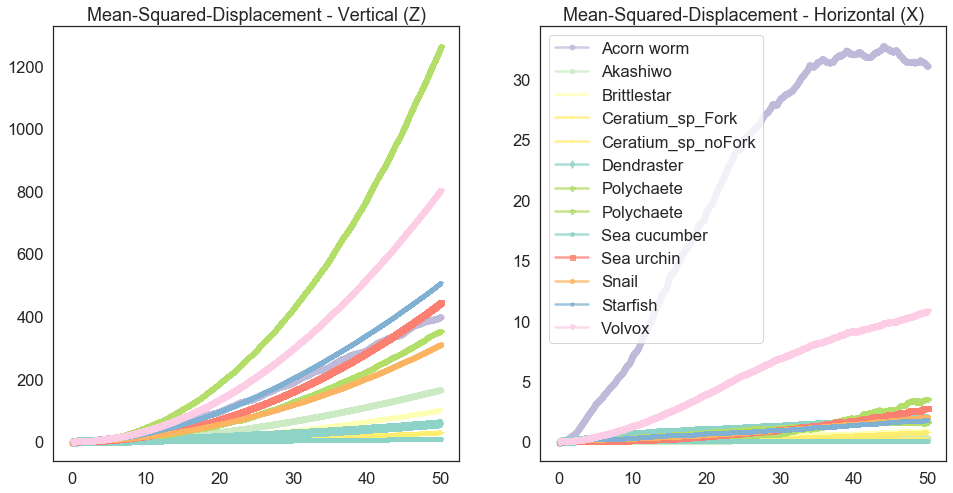

In [69]:
import GravityMachineTrack
import imp
import msdanalyzer
import pandas as pd
import numpy as np
import os
import seaborn as sns
import cmocean
import PlotFunctions.PlotUtils as PlotUtils

import matplotlib.pyplot as plt
%matplotlib inline


# Color schemes for plotting
Organisms = ['Sea cucumber','Dendraster','Brittlestar','Acorn worm','Sea urchin','Starfish','Snail','Polychaete','Volvox','Noctiluca','Pyrocystis','Akashiwo', 'Ceratium_sp_noFork', 'Ceratium_sp_Fork']

OrganismScientific = {'Acorn worm':'S. californicum','Sea urchin':'S. purpuratus','Sea cucumber':'P. parvimensis','Brittlestar':'O. spiculata','Dendraster':'D. excentricus','Polychaete':'Owenia spp.','Starfish':'P. miniata','Snail':'C. fornicata','Noctiluca':'N. scintillans','Pyrocystis':'P. noctiluca','Volvox':'V. aureus', 'Akashiwo':'A. sanguinea', 'Ceratium_sp_noFork':'Ceratium sp.', 'Ceratium_sp_Fork': 'C. furca'}
MarkerStyle = {'Acorn worm':'o','Sea urchin':'s','Sea cucumber':'p','Brittlestar':'1','Dendraster':'d','Polychaete':'P','Starfish':'*','Snail':'8','Noctiluca':'X','Pyrocystis':'+','Volvox':'v','Akashiwo':'h', 'Ceratium_sp_noFork':'4', 'Ceratium_sp_Fork': '2'}

cmap = plt.get_cmap("Set3")
# cmap = cmocean.cm.deep

# cmap = sns.hls_palette(len(Organisms), l=.3, s=.8)

cmap_new = []
ColorStyle={}
for ii in np.linspace(int(0),int(cmap.N),len(Organisms),dtype='int'):
    print(ii)
    cmap_new.append(cmap(ii))


for ii, org in enumerate(Organisms):
    ColorStyle[org] = cmap_new[ii]


# Load all the MSD trajectories

msd_folder = 'C:/Users/Deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis/MSD_trajectories'

# os.chdir(msd_folder)

# msd_file = 'msd_combined_csv.csv'

# df = pd.read_csv(msd_file)

files = os.listdir(msd_folder)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))


    

for file in files:
    
    data = pd.read_csv(os.path.join(msd_folder, file))
    
    Organism = data['Organism'][0]
    
    print(Organism)
    
    delays = data['delays']
    
    MSD_X = data['MSD_X']
    MSD_Z = data['MSD_Z']
    
    stdev_X = data['stdev_X']
    stdev_Z = data['stdev_Z']
    
    print(MarkerStyle[Organism])
    print(ColorStyle[Organism])
    
#     PlotUtils.errorfill_sns(delays, MSD_Z, stdev_Z, ax = axes[0], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Vertical (Z)')
#     PlotUtils.errorfill_sns(delays, MSD_X, stdev_X, ax = axes[1], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Horizontal (X)')
    
#     sns.relplot(x = delays, y = MSD_Z, ax = axes[0], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Vertical (Z)')
#     sns.relplot(x = delays, y = MSD_X, ax = axes[1], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Horizontal (X)')
    
    axes[0].plot(delays,MSD_Z, color = ColorStyle[Organism], marker = MarkerStyle[Organism], MarkerSize = 5, label = Organism, alpha = 0.75)
    axes[1].plot(delays, MSD_X, color = ColorStyle[Organism], marker = MarkerStyle[Organism], MarkerSize = 5, label = Organism, alpha = 0.75)
    axes[0].set_title('Mean-Squared-Displacement - Vertical (Z)')
    axes[1].set_title('Mean-Squared-Displacement - Horizontal (X)')
    
    plt.legend(prop={'size': 6})


plt.savefig(os.path.join(msd_folder, 'Combined_MSD.svg'), dpi = 150)
plt.savefig(os.path.join(msd_folder,'Combined_MSD.png'), dpi = 150)
    

plt.show()
    
    

    
    
    


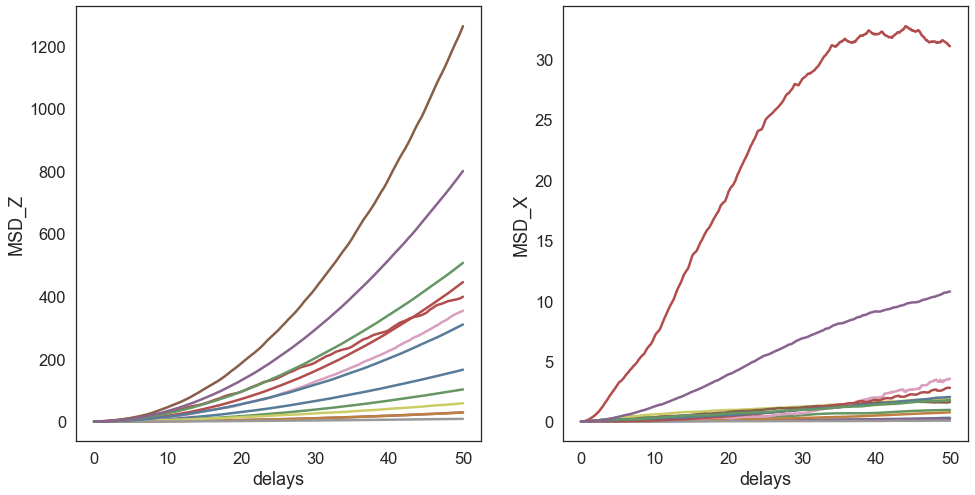

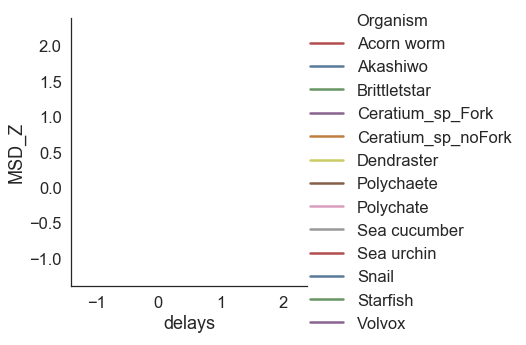

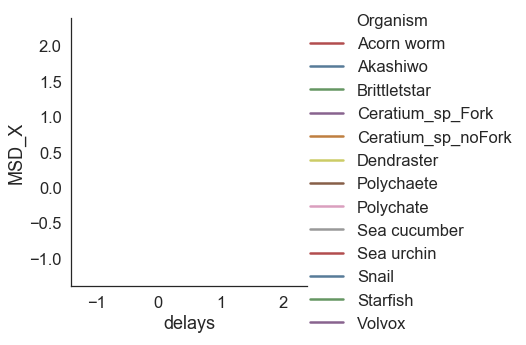

In [34]:
# Plot the MSD curves on top of each other

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("white")

f, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.relplot(x="delays", y="MSD_Z", hue = "Organism", data = df, ax=axes[0], palette = sns.color_palette("Set1", n_colors = 13, desat=.5), legend = "full", kind = "line")
sns.relplot(x="delays", y="MSD_X", hue = "Organism", data = df, ax=axes[1], palette = sns.color_palette("Set1", n_colors = 13, desat=.5), legend = "full", kind = "line")



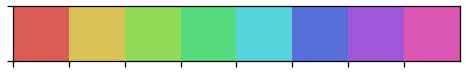

In [27]:
sns.palplot(sns.color_palette("hls", 8))


In [49]:
len(files)

13

In [51]:
print(cmap)

[(0.54, 0.08879999999999995, 0.05999999999999994), (0.54, 0.31033846153846156, 0.05999999999999994), (0.54, 0.5318769230769231, 0.05999999999999994), (0.32658461538461525, 0.54, 0.05999999999999994), (0.10504615384615383, 0.54, 0.05999999999999994), (0.05999999999999994, 0.54, 0.2364923076923078), (0.05999999999999994, 0.54, 0.45803076923076946), (0.05999999999999994, 0.40043076923076887, 0.54), (0.05999999999999994, 0.17889230769230743, 0.54), (0.16264615384615358, 0.05999999999999994, 0.54), (0.3841846153846157, 0.05999999999999994, 0.54), (0.54, 0.05999999999999994, 0.4742769230769225), (0.54, 0.05999999999999994, 0.252738461538461)]


In [53]:
cmap[0]

(0.54, 0.08879999999999995, 0.05999999999999994)

In [57]:
len(cmap)

13

In [58]:
cmap[13]

IndexError: list index out of range

In [59]:
len(files)

13